# TGFBR2
TGFBR2 codes for Transforming Growth Factor Beta Receptor 2, a transmembrane protein that has a protein kinase domain and forms a heterodimeric complex with TGF-beta receptor type-1. This complex binds TGF-beta.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.4


## TGFBR2
We use the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'TGFBR2'
mane_tx_id = 'NM_003242.6'
mane_protein_id = 'NP_003233.4' # TGF-beta receptor type-2 isoform B precursor
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets


phenopacket_store_release = '0.1.24' 
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
qc.summarize()

Individuals Processed: 100%|██████████| 53/53 [00:00<00:00, 69.08 individuals/s] 
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
33,Aortic root aneurysm
26,Arachnodactyly
25,Joint hypermobility
23,Scoliosis
20,Arterial tortuosity
20,Bifid uvula
19,Epicanthus
19,Malar flattening
16,High palate
15,Disproportionate tall stature


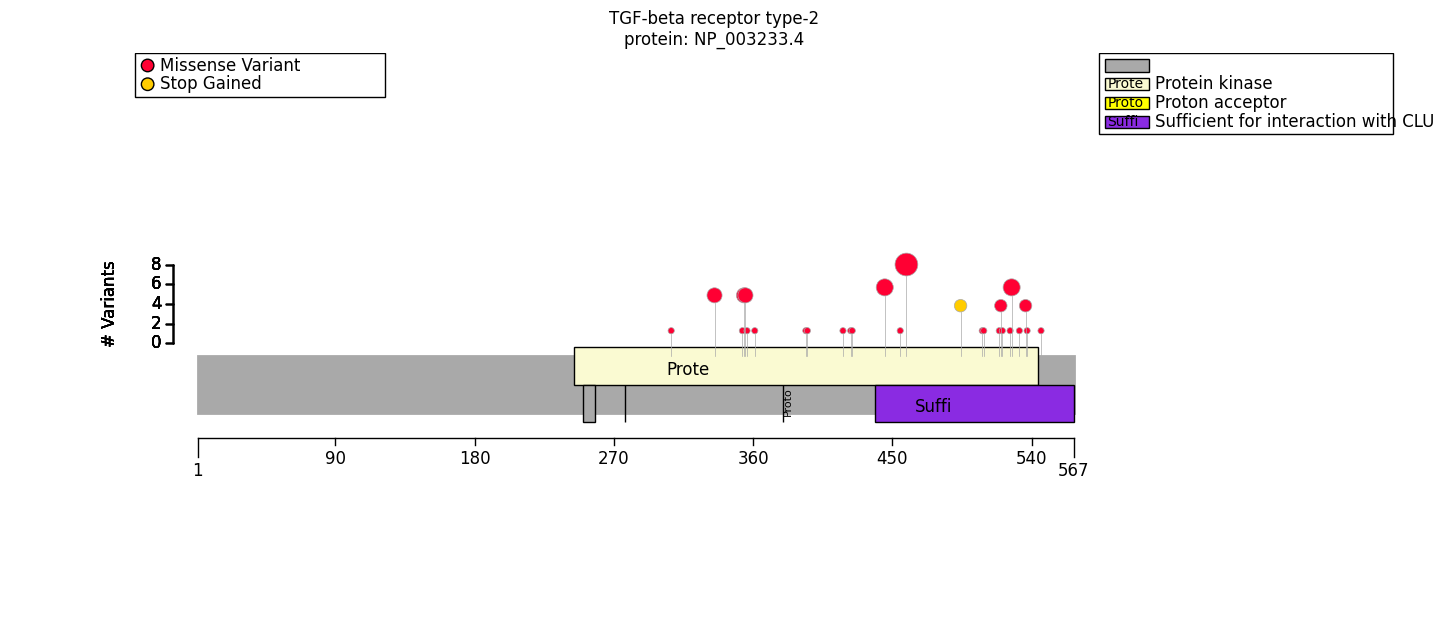

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

tgfbr2_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
tgfbr2_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
pvv = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
pvv.process(cohort=cohort)

Count,Name,Type,Coordinates,Variants
48,Protein kinase,Domain,245 - 544,p.Cys520Phe; p.Val419Leu; p.Arg495Ter; p.Arg460His; p.Asp446Asn; p.Cys533Phe; p.Leu395Pro; p.Ala527Thr; p.Arg460Gly; p.Arg537Cys; p.Ala355Pro; p.Glu456Lys; p.Ile510Ser; p.Leu308Pro; p.Tyr424Asp; p.Arg528Cys; p.Arg460Cys; p.Tyr336Asn; p.Trp521Arg; p.Cys396Tyr; p.His362Tyr; p.Phe538Ser; p.Asp446Tyr; p.Gly357Trp; p.Asp522Asn; p.Leu354Pro; p.Arg528His; p.Met425Val; p.Gly509_Ile510delinsValPhe; p.Arg356Pro
0,,Binding site,251 - 258,
0,,Binding site,278 - 277,
0,Proton acceptor,Active site,380 - 379,
31,Sufficient for interaction with CLU,Region,440 - 567,p.Cys520Phe; p.Arg495Ter; p.Arg460His; p.Asp446Asn; p.Cys533Phe; p.Ala527Thr; p.Arg460Gly; p.Arg537Cys; p.Glu456Lys; p.Ile510Ser; p.Arg528Cys; p.Arg460Cys; p.Trp521Arg; p.Phe538Ser; p.Asp446Tyr; p.Asp522Asn; p.Arg528His; p.Leu547Pro; p.Gly509_Ile510delinsValPhe


In [7]:
from gpsea.view import CohortVariantViewer

viewer = CohortVariantViewer(tx_id=mane_tx_id)
viewer.process(cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
6,3_30674228_30674228_C_T,c.1378C>T (p.Arg460Cys),5,missense
3,3_30691477_30691477_C_T,c.1582C>T (p.Arg528Cys),7,missense
3,3_30672189_30672189_T_A,c.1006T>A (p.Tyr336Asn),4,missense
3,3_30672250_30672250_G_C,c.1067G>C (p.Arg356Pro),4,missense
3,3_30672246_30672246_G_C,c.1063G>C (p.Ala355Pro),4,missense
2,3_30691456_30691456_T_C,c.1561T>C (p.Trp521Arg),7,missense
2,3_30674186_30674186_G_A,c.1336G>A (p.Asp446Asn),5,missense
2,3_30674186_30674186_G_T,c.1336G>T (p.Asp446Tyr),5,missense
2,3_30688470_30688470_C_T,c.1483C>T (p.Arg495Ter),6,stop gained
2,3_30644921_30644921_C_T,c.263+6C>T (-),-,"splice donor, intronic"


## Genotype-Phenotype Correlation (GPC) Analysis

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [9]:
from gpsea.view import MtcStatsViewer
from gpsea.analysis.predicate import protein_feature
from gpsea.analysis.clf import monoallelic_classifier


clu = protein_feature(feature_id="Sufficient for interaction with CLU", protein_metadata=protein_meta)

clu_clf = monoallelic_classifier(
    a_predicate=clu,
    b_predicate=~clu,
    a_label="CLU interaction region",
    b_label="Other")
clu_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=clu_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(clu_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,30
HMF03,Skipping term because of a child term with the same individual counts,4
HMF08,Skipping general term,66
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,193


In [10]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=clu_result)

Allele group,CLU interaction region,Other,Corrected p values,p values
Malar flattening [HP:0000272],6/19 (32%),13/15 (87%),0.069502,0.001878
Dural ectasia [HP:0100775],2/17 (12%),4/7 (57%),0.482110,0.038069
Exotropia [HP:0000577],0/9 (0%),6/13 (46%),0.482110,0.046078
Scoliosis [HP:0002650],9/20 (45%),14/18 (78%),0.482110,0.052120
Pectus excavatum [HP:0000767],9/14 (64%),3/11 (27%),0.819190,0.110701
Epicanthus [HP:0000286],13/18 (72%),6/12 (50%),1.000000,0.266258
Bifid uvula [HP:0000193],8/18 (44%),12/18 (67%),1.000000,0.314530
Joint hypermobility [HP:0001382],14/16 (88%),11/16 (69%),1.000000,0.394389
Disproportionate tall stature [HP:0001519],8/12 (67%),7/15 (47%),1.000000,0.440795
Arachnodactyly [HP:0001166],13/24 (54%),13/20 (65%),1.000000,0.546718


In [11]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect

missense = variant_effect(effect=VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)
missense_clf =monoallelic_classifier(
    a_predicate=missense,
    b_predicate=~missense,
    a_label="Missense",
    b_label="Other")
missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group,Missense,Other,Corrected p values,p values
Aortic root aneurysm [HP:0002616],31/33 (94%),2/4 (50%),0.968003,0.049981
Mitral valve prolapse [HP:0001634],10/28 (36%),3/3 (100%),0.968003,0.063626
Dural ectasia [HP:0100775],3/19 (16%),3/5 (60%),0.968003,0.078487
Arterial tortuosity [HP:0005116],20/24 (83%),3/6 (50%),1.000000,0.120130
Scoliosis [HP:0002650],18/33 (55%),5/5 (100%),1.000000,0.135567
Talipes equinovarus [HP:0001762],11/21 (52%),0/3 (0%),1.000000,0.222826
Disproportionate tall stature [HP:0001519],12/24 (50%),3/3 (100%),1.000000,0.230769
Malar flattening [HP:0000272],18/30 (60%),1/4 (25%),1.000000,0.299422
Bifid uvula [HP:0000193],19/32 (59%),1/4 (25%),1.000000,0.303285
Pectus excavatum [HP:0000767],11/20 (55%),1/5 (20%),1.000000,0.321739


In [12]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Arachnodactyly [HP:0001166],15/19 (79%),11/25 (44%),0.401834,0.030437
Talipes equinovarus [HP:0001762],3/13 (23%),8/11 (73%),0.401834,0.037727
Bifid uvula [HP:0000193],8/20 (40%),12/16 (75%),0.401834,0.048548
Dilatation of the cerebral artery [HP:0004944],3/12 (25%),11/16 (69%),0.401834,0.054238
Disproportionate tall stature [HP:0001519],4/12 (33%),11/15 (73%),0.401834,0.057405
Epicanthus [HP:0000286],6/13 (46%),13/17 (76%),0.771281,0.132220
Dermal translucency [HP:0010648],6/12 (50%),3/10 (30%),1.000000,0.414861
Scoliosis [HP:0002650],8/15 (53%),15/23 (65%),1.000000,0.513572
Pectus excavatum [HP:0000767],5/12 (42%),7/13 (54%),1.000000,0.695098
Mitral valve prolapse [HP:0001634],6/13 (46%),7/18 (39%),1.000000,0.726954


# Summary

In [13]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

f_results = (
    GPAnalysisResultSummary.from_mono(
        result=clu_result,
    ),
    GPAnalysisResultSummary.from_mono(
        result=missense_result,
    ),
    GPAnalysisResultSummary.from_mono(
        result=mf_result,
    )
)

caption = "No statistically significant results identified."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [14]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
CLU interaction region,Other,37,0
Genotype (A),Genotype (B),Tests performed,Significant tests
Missense,Other,37,0
Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,35,0


In [15]:
summarizer.process_latex(report=report, protein_fig=tgfbr2_fig)

Figure saved to ../../supplement/img/TGFBR2_protein_diagram-draft.pdf
Output to ../../supplement/tex/TGFBR2_summary_draft.tex
